## Probability and Regression

My own reworking of the example code within the text book.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotnine as p

In [2]:
# read data
def read_data(file):
    return pd.read_csv("https://raw.github.com/scunning1975/mixtape/master/" + file)

In [52]:
np.random.seed(1)

df = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)})
df['y'] = 5.5*df['x'].values + 12*df['u'].values

In [53]:
df

,x,u,y
0,1.624345,-0.122474,7.464213
1,-0.611756,0.228170,-0.626622
2,-0.528172,-0.352305,-7.132606
3,-1.072969,-0.830553,-15.867969
4,0.865408,-0.261090,1.626664
...,...,...,...
9995,0.072959,-0.943208,-10.917229
9996,0.489102,0.782216,12.076651
9997,-1.014144,2.408434,23.323415
9998,-0.062696,0.882786,10.248597


In [54]:
reg_df = sm.OLS.from_formula('y ~ x', data=df).fit()
reg_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        14:57:35   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.354      -0.124       0.347
x              5.6887      0.120     47.293      0.000       5.453       5.924
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.672
Skew:                          -0.012   Prob(JB):                        0.715
Kurtosis:                       2.968   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After running the OLS fit, we can predict the parameters of $\hat{y}$ (predicted value of $y$, given the OLS fit) and $\hat{u}$ (the residual, i.e., $y - \hat{y}$ ) with the `statsmodel` package, or manually, using the coefficients from the summary above.


$$
y = \beta_0 + \beta_1 x + u
$$

where:
- $x =$ data point that is influencing the effect
- $y =$ the effect/outcome
- $\beta_0 =$ the intercept
- $\beta_1 =$ the coefficient for $x$
- $u = $ the error term (captures other factors that are causing the outcome effect not captured by this model)

This represents our model of the world when applying OLS.


Then, given some observed data, the equation is represented with the  $\hat{~}$  symbol to show that we're making estimates. Also, the $u$ term now represents the _residuals_ — the difference between the predicted $\hat{y}$ and the real $y$ - instead of the error term.

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + u
$$

where:
- $x =$ data point that is influencing the estimated effect
- $\hat{y} =$ the estimated effect/outcome
- $\beta_0 =$ the estimated intercept
- $\beta_1 =$ the estimated coefficient for $x$
- $u = $ the residual (captures the difference between the predicted $\hat{y}$ and the real $y$)


**In the summary above, the `Intercept` coefficient = the intercept of the fit and the `x` coefficient represents $\hat{\beta}_1$**

This means that our OLS model fit equation becomes:

$$
\hat{y} = 0.1114 + 5.6887x
$$

As mentioned above, we can calculate the $\hat{y}$ and $u$ (residual) values for all data points using either the `statsmodels` object, `reg_tb`, or simply plugging our `x` values into the equation returned by the summary data.

In [55]:

# Calculating values with statsmodels
df['yhat1'] = reg_df.predict(df)
df['uhat1'] = reg_df.resid

# Calculating them manually
df['yhat2'] = 0.1114 + 5.6887*df['x']
df['uhat2'] = df['y'] - df['yhat2']

### As you can see below, the values are very similar.

In [56]:
df[['yhat1', 'yhat2']]

,yhat1,yhat2
0,9.351735,9.351813
1,-3.368695,-3.368699
2,-2.893210,-2.893211
3,-5.992376,-5.992397
4,5.034394,5.034444
...,...,...
9995,0.526418,0.526439
9996,2.893719,2.893755
9997,-5.657741,-5.657760
9998,-0.245276,-0.245260


In [57]:
df[['uhat1', 'uhat2']]

,uhat1,uhat2
0,-1.887522,-1.887601
1,2.742073,2.742076
2,-4.239396,-4.239396
3,-9.875593,-9.875572
4,-3.407730,-3.407780
...,...,...
9995,-11.443647,-11.443668
9996,9.182932,9.182895
9997,28.981156,28.981175
9998,10.493874,10.493857


### While there are some minor differences we can see that, overall, the averages are very similar. Compare the summary statistics for `yhat1` with `yhat2` as well as `uhat1` with `uhat2` and you'll see that they are nearly identical.

In [58]:
df.describe()

,x,u,y,yhat1,uhat1,yhat2,uhat2
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,0.009773,0.009435,0.166975,0.166975,-2.120970e-16,0.166994,-0.000019
std,0.998836,1.001239,13.289365,5.682040,1.201339e+01,5.682077,12.013394
min,-3.656440,-3.451403,-50.654682,-20.688875,-4.142425e+01,-20.688991,-41.424248
25%,-0.662925,-0.672294,-8.827691,-3.659775,-8.199882e+00,-3.659781,-8.199908
50%,0.008454,0.018803,0.242724,0.159473,4.497835e-02,0.159493,0.044993
75%,0.671809,0.688683,9.232769,3.933075,8.147307e+00,3.933119,8.147305
max,4.026849,4.168118,48.162716,23.018769,5.000751e+01,23.018936,50.007515


In [59]:
(df['yhat1'] * df['uhat1']).sum()

-1.3096723705530167e-10

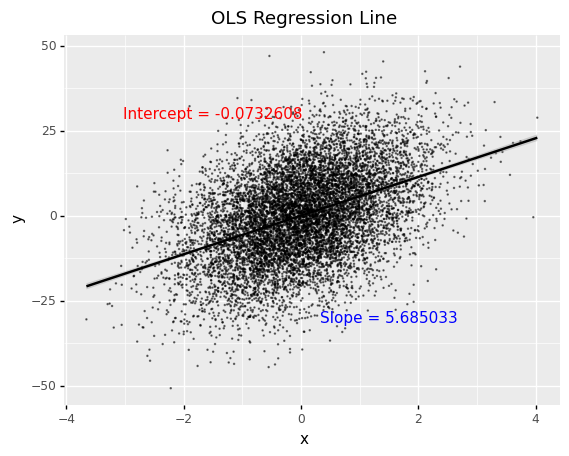

<ggplot: (8785856969489)>

In [60]:
p.ggplot(df, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.00001, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red", 
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue", 
             label = "Slope = {}".format(5.685033))

## Some algebraic properties of OLS

### 1. The sum of the residuals, $\sum u$, will always = 0

### Note that the sum of the residuals, by design, will always equal 0. This is because the OLS fit minimized difference between the data points and the fitted line. More specifically, the OLS form is trying to find the best fit line that minimizes — leads to zero — residual error.

In [61]:
df['yhat'] = reg_df.predict(df)
df['uhat'] = reg_df.resid

In [62]:
reg_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        14:57:50   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.354      -0.124       0.347
x              5.6887      0.120     47.293      0.000       5.453       5.924
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.672
Skew:                          -0.012   Prob(JB):                        0.715
Kurtosis:                       2.968   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
print(f"Residual sum = {df['uhat'].sum()}")

# The very small number has to do with rounding and floating point representation issues so
# we can check with the np.allclose() method to make sure it is very close to zero.
np.allclose(df['uhat'].sum(), 0)

Residual sum = -1.6910917111090384e-12


True

In [64]:
# Remember, this is just the difference between
# the predicted y value (yhat) and the real value for y
(df['y'] - df['yhat']).sum()

-1.6910917111090384e-12

### 2. Given what residuals represent: $\hat{y} + \hat{u} = y$

In [65]:
# This shows the difference for each value
np.allclose(df['yhat'] + df['uhat'], df['y'])

True

In [66]:
# This shows the difference for the mean of all values
np.allclose(
    df['yhat'].mean() + df['uhat'].mean(),
    df['y'].mean()
)

True

### 3. Again, by design, the residuals do not correlate with either the $x$ or $\hat{y}$ variables.

In [67]:
import matplotlib.pyplot as plt

#### First, we can show this visually

Text(0, 0.5, 'Residuals')

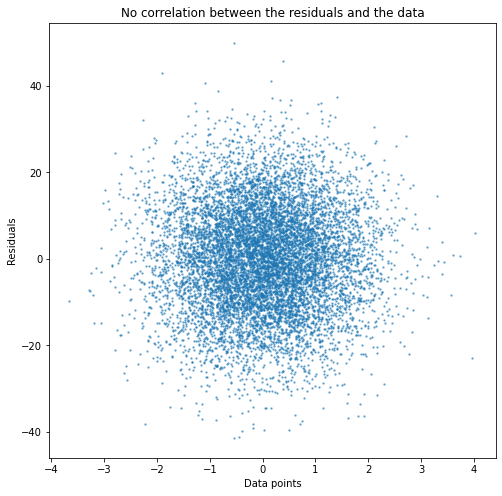

In [68]:
plt.figure(figsize=(8,8))
plt.title("No correlation between the residuals and the data")
plt.scatter(df['x'], df['uhat'], s=2, alpha=.5)
plt.xlabel("Data points")
plt.ylabel("Residuals")

Text(0, 0.5, 'Fitted values')

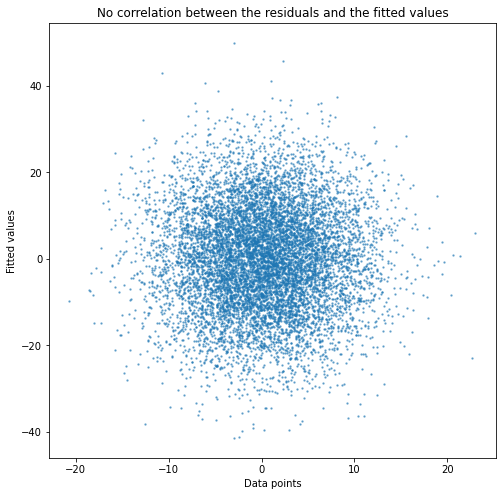

In [69]:
plt.figure(figsize=(8,8))
plt.title("No correlation between the residuals and the fitted values")
plt.scatter(df['yhat'], df['uhat'], s=2, alpha=.5)
plt.xlabel("Data points")
plt.ylabel("Fitted values")

#### Next we can show this mathematically.

First, we can just import and calculate the correlation using `scipy`...

In [70]:
from scipy.stats import pearsonr

r,pval = pearsonr(df['x'], df['uhat'])
print(f'Correlation = {r}')
print(f'pvalue = {pval}')

Correlation = -2.0751629581372555e-16
pvalue = 1.000000000006041


In [71]:
r,pval = pearsonr(df['yhat'], df['uhat'])
print(f'Correlation = {r}')
print(f'pvalue = {pval}')

Correlation = -1.986258379993444e-16
pvalue = 1.000000000006041


Lets also consider the equation for correlation:

$$
r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2(y_i - \bar{y})^2}}
$$

Since the mean value in the numerator is just subtracting away the average of each value, and the variance in the denominator is just a normalization factor, we can simply look at the sum of all these values — if they are not correlated at all, the value should equal zero. That is:

If $\mbox{correlation}(x,\hat{u}) = 0$, then:

$$
\sum x_i \hat{u}_i = 0
$$



In [72]:
np.allclose( (df['x'] * df['uhat']).sum(), 0)

True

The same logic applies to the values of $\hat{y}$ and $\hat{u}$, so again: if $\mbox{correlation}(\hat{y},\hat{u}) = 0$, then:

$$
\sum \hat{y}_i \hat{u}_i = 0
$$

In [73]:
np.allclose( (df['yhat'] * df['uhat']).sum(), 0)

True

In [74]:
df

,x,u,y,yhat1,uhat1,yhat2,uhat2,yhat,uhat
0,1.624345,-0.122474,7.464213,9.351735,-1.887522,9.351813,-1.887601,9.351735,-1.887522
1,-0.611756,0.228170,-0.626622,-3.368695,2.742073,-3.368699,2.742076,-3.368695,2.742073
2,-0.528172,-0.352305,-7.132606,-2.893210,-4.239396,-2.893211,-4.239396,-2.893210,-4.239396
3,-1.072969,-0.830553,-15.867969,-5.992376,-9.875593,-5.992397,-9.875572,-5.992376,-9.875593
4,0.865408,-0.261090,1.626664,5.034394,-3.407730,5.034444,-3.407780,5.034394,-3.407730
...,...,...,...,...,...,...,...,...,...
9995,0.072959,-0.943208,-10.917229,0.526418,-11.443647,0.526439,-11.443668,0.526418,-11.443647
9996,0.489102,0.782216,12.076651,2.893719,9.182932,2.893755,9.182895,2.893719,9.182932
9997,-1.014144,2.408434,23.323415,-5.657741,28.981156,-5.657760,28.981175,-5.657741,28.981156
9998,-0.062696,0.882786,10.248597,-0.245276,10.493874,-0.245260,10.493857,-0.245276,10.493874


In [75]:
((df['y'] - df['y'].mean())**2).sum()

1765895.6166331377

In [76]:
(df['yhat'] - df['y']).sum()

1.6910917111090384e-12

In [78]:
df['y'].mean()

0.1669745732103024

In [79]:
reg_df.params["x"] * text_x

-227.54652941865058

Text(0, 0.5, 'y-values')

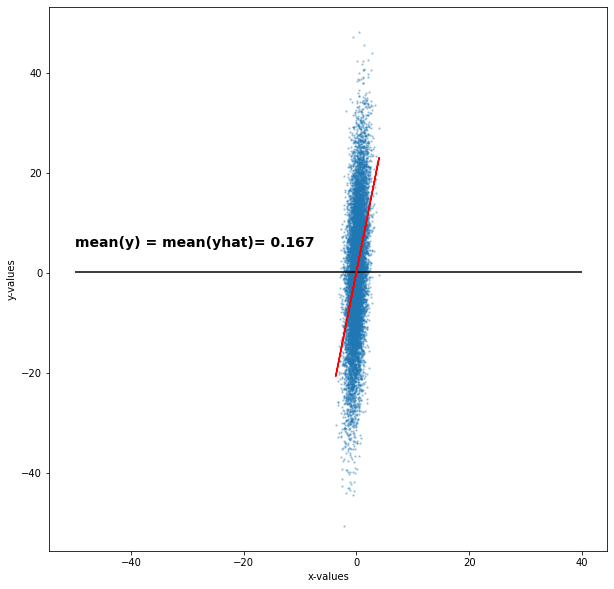

In [80]:
plt.figure(figsize=(10,10))

# Plot the x and y data
plt.scatter(df['x'], df['y'], s = 2, alpha=.3)

text_x = -40
text_y = reg_df.params["x"] * text_x

# plt.annotate(
#     text = f"Slope = {np.round(reg_df.params['x'], 4)}",
#     xy=(text_x,text_y + 10),
#     rotation = 30,
#     fontweight='bold',
#     fontsize=14
# )

# Plot the fit line
plt.plot(df['x'], df['yhat'], c='red')
plt.annotate(
    text = f"mean(y) = mean(yhat)= {np.round(df['y'].mean(),4)}",
    xy=(-50,df['y'].mean()+5),
    fontweight='bold',
    fontsize=14
)


# plot the mean(y) value
plt.hlines(y=df['y'].mean(), xmin=-50, xmax=40, color='black')

plt.xlabel("x-values")
plt.ylabel("y-values")


# Goodness of fit


## Different types of 'Sum of squares'

### Total sum of squares (SST):

$$
\mbox{SST} = \sum(y_i - \bar{y})^2
$$

This is the sum of the squared vertical distance between all data points and the mean $y$ value (black line above).

### Explained sum of squares (SSE):

$$
\mbox{SSE} = \sum(\hat{y}_i - \bar{y})^2
$$

This is the sum of the squared vertical distance between all predicted $\hat{y}$ values (those that fall on the red line above) and mean $y$ value (black line above).

### Residual sum of squares (SSR):

$$
\mbox{SSR} = \sum \hat{u}^2 = \sum (y_i - \hat{y}_i)^2
$$

This is the sum of the squared vertical distance between the predicted $\hat{y}$ values (those that fall on the red line above) and the real $y$ values .





## Lets visually represent what each of these mean by taking a smaller sample of random data and highlighting the error that each of the above metrics captures.

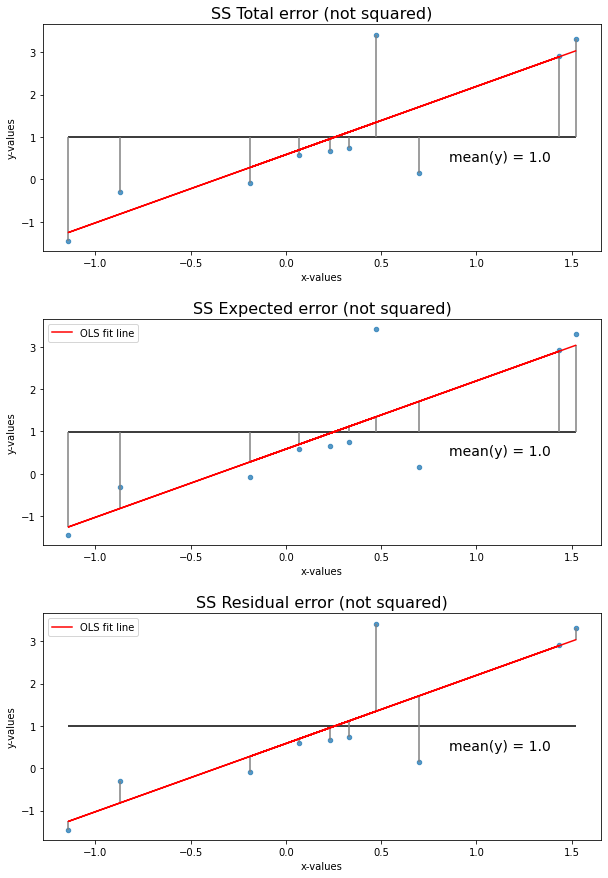

In [104]:
num_data_points = 10

df = pd.DataFrame(
        {
            'x': np.random.normal(size=num_data_points),
            'u': np.random.normal(size=num_data_points)
        }
    )
    
# Feed all data points to into the equation: 3 + 2x + U
df['y'] = 1 + 1.5*df['x'].values + df['u'].values

# Fit the data
reg_df = sm.OLS.from_formula('y ~ x', data=df).fit()

# Predict the yvalues with the OLS regression fit
df['yhat'] = reg_df.predict()

plt.figure(figsize=(10,15))

### Show sum of squares TOTAL
# --------------------------
plt.subplot(311)
plt.title('SS Total error (not squared)', fontsize=16)

# Plot the x and y data
plt.scatter(df['x'], df['y'], s = 20, alpha=.75)

# Plot the fit line
plt.plot(df['x'], df['yhat'], c='red')
plt.annotate(
    text = f"mean(y) = {np.round(df['y'].mean(),2)}",
    xy=(
        df['x'].max() - ((df['x'].max() - df['x'].min()) *.25),
        df['y'].mean() - ((df['y'].mean() - df['yhat'].min()) *.25),
    ),
    fontsize=14
)


# plot the mean(y) value
plt.hlines(y=df['y'].mean(), xmin=df['x'].min(), xmax=df['x'].max(), color='black')

plt.xlabel("x-values")
plt.ylabel("y-values")

ymean = df['y'].mean()

for x in range(len(df)):
    yval = df.iloc[x].y
    xval = df.iloc[x].x
    
    if yval < ymean:
        plt.vlines(xval, ymin=yval, ymax= ymean, color='grey')
    elif yval > ymean:
        plt.vlines(xval, ymin=ymean, ymax = yval, color='grey')

        
        
### Show sum of squares EXPECTED
# --------------------------
plt.subplot(312)
plt.title('SS Expected error (not squared)', fontsize=16)

# Plot the x and y data
plt.scatter(df['x'], df['y'], s = 20, alpha=.75)

# Plot the fit line
plt.plot(df['x'], df['yhat'], c='red', label='OLS fit line')
plt.annotate(
    text = f"mean(y) = {np.round(df['y'].mean(),2)}",
    xy=(
        df['x'].max() - ((df['x'].max() - df['x'].min()) *.25),
        df['y'].mean() - ((df['y'].mean() - df['yhat'].min()) *.25),
    ),
    fontsize=14
)

plt.legend()

# plot the mean(y) value
plt.hlines(y=df['y'].mean(), xmin=df['x'].min(), xmax=df['x'].max(), color='black')

plt.xlabel("x-values")
plt.ylabel("y-values")


for x in range(len(df)):
    yval = df.iloc[x].yhat
    xval = df.iloc[x].x
    
    if yval < ymean:
        plt.vlines(xval, ymin=yval, ymax= ymean, color='grey')
    elif yval > ymean:
        plt.vlines(xval, ymin=ymean, ymax = yval, color='grey')
        
        
        
### Show sum of squares RESIDUAL
# --------------------------
plt.subplot(313)
plt.title('SS Residual error (not squared)', fontsize=16)

# Plot the x and y data
plt.scatter(df['x'], df['y'], s = 20, alpha=.75)

# Plot the fit line
plt.plot(df['x'], df['yhat'], c='red', label='OLS fit line')
plt.annotate(
    text = f"mean(y) = {np.round(df['y'].mean(),2)}",
    xy=(
        df['x'].max() - ((df['x'].max() - df['x'].min()) *.25),
        df['y'].mean() - ((df['y'].mean() - df['yhat'].min()) *.25),
    ),
    fontsize=14
)

plt.legend()

# plot the mean(y) value
plt.hlines(y=df['y'].mean(), xmin=df['x'].min(), xmax=df['x'].max(), color='black')

plt.xlabel("x-values")
plt.ylabel("y-values")


for x in range(len(df)):
    yhat = df.iloc[x].yhat
    yval = df.iloc[x].y
    xval = df.iloc[x].x
    
    if yval < yhat:
        plt.vlines(xval, ymin=yval, ymax= yhat, color='grey')
    elif yval > yhat:
        plt.vlines(xval, ymin=yhat, ymax = yval, color='grey')
    else:
        print("Whoops!",x,yhat,yval)

plt.subplots_adjust(hspace=.3)

## Now lets better understand what these metrics represent

In [105]:
SST = sum((df['y'] - df['y'].mean())**2)
SSE = sum((df['yhat'] - df['y'].mean())**2)
SSR = sum((df['y'] - df['yhat'])**2)

print(f"SST = {SST:,.4f}")
print(f"SSE = {SSE:,.4f}")
print(f"SSR = {SSR:,.4f}")

SST = 24.7667
SSE = 17.3390
SSR = 7.4277


### As mentioned in the book, if we divide each of these metrics by $n-1$, we will get the _sample variance_ of each. For example:

$$
\frac{SST}{n-1} = \mbox{sample variance of } y_i
$$

$$
\frac{SSE}{n-1} = \mbox{sample variance of } \hat{y}_i
$$

$$
\frac{SSR}{n-1} = \mbox{sample variance of } u_i
$$

Overall, they represent the expected variance of the given metric from it's average (mean) value.


### We can easily confirm this by using the builtin python methods to calculate the variance of each column


In [106]:
y_pd_var = df['y'].var()
y_manual_var = SST/(len(df)-1)
print(np.allclose(y_pd_var, y_manual_var))


yhat_pd_var = df['yhat'].var()
yhat_manual_var = SSE/(len(df)-1)
print(np.allclose(yhat_pd_var, yhat_manual_var))


df['uhat'] = reg_df.resid
residual_pd_var = df['uhat'].var()
residual_manual_var = SSR/(len(df)-1)
print(np.allclose(residual_pd_var, residual_manual_var))

True
True
True


### Also, note that:

$$
SST = SSE + SSR
$$

In [107]:
ssr_and_SSE = SSR + SSE

np.allclose(SST,ssr_and_SSE)

True

### Assuming that $SST > 0$, we can use the variance measure to define the fraction of the total variation in $y_i$ that is explained by $x_i$ — i.e., by the OLS regression line as:

$$
R^2 = \frac{SSE}{SST} = 1 - \frac{SSR}{SST}
$$

Lets confirm this by calculating $R^2$ with built in methods.

In [108]:
sse_and_sst_r2 = SSE/SST
ssr_and_sst_r2 = 1 - (SSR/SST)
if np.allclose(sse_and_sst_r2, ssr_and_sst_r2):
    print(f"Manual R^2 = {ssr_and_sst_r2}")


Manual R^2 = 0.7000927268294164


In [109]:
r, pval = pearsonr(df['x'], df['y'])

built_in_r2 = r**2

print(f"Manual R^2 = {built_in_r2}")

np.allclose(sse_and_sst_r2, built_in_r2)



Manual R^2 = 0.7000927268294161


True

## The OLS is an unbiased estimator of $\beta$ in the population because it's expected value across samples is the $\beta$ value for the true population.

In [110]:
# Generate lots of random data, taking the beta coefficient each time

coefs = np.zeros(1000)

# For 1,000 random data sets...
for i in range(1000):
    
    # Create 10,000 random observations
    df = pd.DataFrame(
        {
            'x': 9*np.random.normal(size=10000),
            'u': 36*np.random.normal(size=10000)
        }
    )
    
    # Feed all data points to into the equation: 3 + 2x + U
    df['y'] = 3 + 2*df['x'].values + df['u'].values
    
    # Calculate the OLS fit
    reg_df = sm.OLS.from_formula('y ~ x', data=df).fit()
    
    # Store the `x` coefficient, i.e., the B_1 estimate (i.e., \hat{B_1})
    coefs[i] = reg_df.params['x']

In [111]:
coefs.mean()

1.9991905625948667


### Now we can create a histogram of those coefficients. As you can see below, the predicted coefficients correctly group around 2, as this was the coefficient that we fed into our equation above. That said, it is not always exactly 2 because we are creating random noise in the form of the random residual values. 


### If you rerun the equation above but comment out the `+ tb['u'].values` portion of line 15, you'll see that _all_ predicted coefficients are _exactly 2_ and the noise in the below histogram will go away.

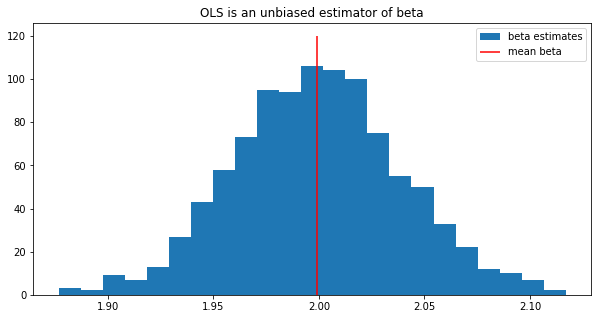

In [112]:
plt.figure(figsize=(10,5))
plt.title("OLS is an unbiased estimator of beta")
_ = plt.hist(coefs, bins='auto', label='beta estimates')
plt.vlines(x=np.mean(coefs), ymin=0,ymax=120, color='red', label='mean beta')
_ = plt.legend()

# Regression anatomy theorem

The regression anatomy theorem is an idea taken from Angrist and Pischke ([2009](https://jonnyphillips.github.io/FLS6415/Class_3/Angrist%20&%20Pischke.pdf)). The idea is that the coefficient of variable $x$'s linear regression in a multiple regression is equivalent to the coefficient of a bivariate model using the _residual_ from a regression of that variable regressed on all the other variables. Regression anatomy provides an answer to the _how_ of control variables work.

Below we work through this idea...

In [113]:
auto = pd.read_stata('https://raw.github.com/scunning1975/mixtape/master/auto.dta')

In [114]:
auto.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [115]:
# Characterizes the length as it's difference from the mean
auto['length'] = auto['length'] - auto['length'].mean()

In [116]:
# Regress price on ONLY LENGTH
lm1 = sm.OLS.from_formula('price ~ length', data=auto).fit()

# Multiple regression of price onto length controlling for weight, headroom, and mpg
lm2 = sm.OLS.from_formula('price ~ length + weight + headroom + mpg', data=auto).fit()

### Lets check out the results...

In [117]:
# Simple regression
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sat, 21 May 2022   Prob (F-statistic):           0.000122
Time:                        15:07:38   Log-Likelihood:                -688.08
No. Observations:                  74   AIC:                             1380.
Df Residuals:                      72   BIC:                             1385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6165.2568    311.395     19.799      0.000    5544.502    6786.011
length        57.2022     14.080      4.063      0.000      29.133      85.271
==============================================================================
Omnibus:                       22.617   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.201
Skew:                           1.378   Prob(JB):                     2.77e-07
Kurtosis:                       4.484   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now lets check out the multiple regression

In [118]:
lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.49e-06
Time:                        15:07:38   Log-Likelihood:                -678.50
No. Observations:                  74   AIC:                             1367.
Df Residuals:                      69   BIC:                             1379.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3581.3766   4538.813     -0.789      0.433   -1.26e+04    5473.307
length       -94.4965     40.396     -2.339      0.022    -175.084     -13.909
weight         4.3350      1.163      3.728      0.000       2.015       6.655
headroom    -490.9667    388.489     -1.264      0.211   -1265.981     284.048
mpg          -87.9584     83.593     -1.052      0.296    -254.721      78.804
==============================================================================
Omnibus:                        5.211   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.062
Skew:                           0.639   Prob(JB):                       0.0796
Kurtosis:                       2.914   Cond. No.                     5.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can see here how the coeficient for `length` change significantly as we are controlling for the other variables and the relationship went from positive (increased car length -> increased price) to negative (increased car lenght -> reduced price).

### Now we plot the different fit lines...

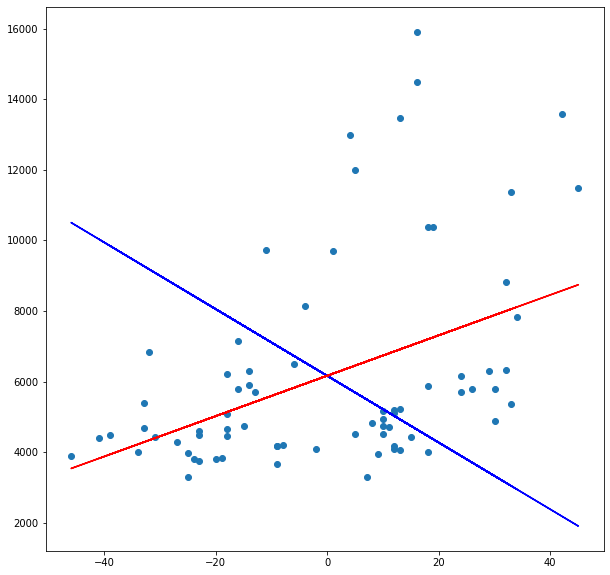

In [119]:
# Collect the parameters from each fit as well as the residuals from the multi-regress model
coef_lm1 = lm1.params
coef_lm2 = lm2.params
resid_lm2 = lm2.resid

# Using the intercept from the single (short) regression for both equations,
# we predict the outcome variable using the coefficient from both regression models
# This is our: y = B_0 + B_1*X equation
auto['y_single'] = coef_lm1[0] + coef_lm1[1]*auto['length']
auto['y_multi'] = coef_lm1[0] + coef_lm2[1]*auto['length']

# Create the figure
plt.figure(figsize = (10,10))
plt.scatter(auto['length'], auto['price'])
plt.plot(auto['length'], auto['y_multi'], color='blue')
plt.plot(auto['length'], auto['y_single'], color='red')

### The important part here, though, is yet to come. 

### Now we regress the `length` onto all of the other variables: `weight`, `headroom`, and `mpg`.

In [120]:
auxilliary_lm = sm.OLS.from_formula('length ~ weight + headroom + mpg', data=auto).fit()

### Then we take the residuals

In [121]:
auto['regress_length_on_controls_resid'] = auxilliary_lm.resid

auto['regress_length_on_controls_resid']

0      1.419421
1    -24.341241
2    -10.581583
3     -0.858066
4      4.472605
        ...    
69     6.277803
70    -2.761974
71    -5.494208
72    -3.983675
73     0.965546
Name: regress_length_on_controls_resid, Length: 74, dtype: float64

### Next we regress the price onto the _residuals_

In [122]:
price_on_resid = sm.OLS.from_formula('price ~ regress_length_on_controls_resid', data=auto).fit()

### If we again look at the summary, we can see that the coefficient of `regress_length_on_controls_resid` with respect to the price is *equal* to the full multiple regression model.

In [123]:
price_on_resid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     3.774
Date:                Sat, 21 May 2022   Prob (F-statistic):             0.0560
Time:                        15:07:41   Log-Likelihood:                -693.82
No. Observations:                  74   AIC:                             1392.
Df Residuals:                      72   BIC:                             1396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         6165.2568    336.536     18.320      0.000    5494.384    6836.130
regress_length_on_controls_resid   -94.4965     48.639     -1.943      0.056    -191.457       2.464
==============================================================================
Omnibus:                       17.465   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.745
Skew:                           1.238   Prob(JB):                     3.13e-05
Kurtosis:                       3.773   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see this a bit more clearly if we just print the coefficients...

In [124]:
lm2.params['length']

-94.49650952525573

In [125]:
price_on_resid.params['regress_length_on_controls_resid']

-94.49650952525647

# Cluster Robust Standard Errors

In [202]:
def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    """
    Generate clustered data.
    
    Parameters:
    -----------
    param (tuple) : (intercept, b1 [aka regression slope])
    n (int) : number of observations
    n_cluster (int) : number of clusters
    rho (float) : controls error variance in generated data
    
    Returns:
    ----------
    - df (pd.dataframe) : data points and cluster values like below.
        {'x':x, 'y':y, 'cluster': cluster_name}
    """

    # Create individual level data
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)
    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # Create cluster level data
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # Add cluster influence components to individual predictor values
    # i.e., predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)
    
    # Add cluster error components to individual error values
    # i.e., error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # Use the parameters provided to generate the treatment effect
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df


In [284]:
def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5, cluster_robust = False):
    """
    Generate a single estimates of the regression slope (b1), the standard error of x (s3),
    and 95% confidence intervals around the estimated b1 slope for a random set of data
    generated (via `gen_cluster`) using the parameters provided.
    
    Parameters:
    -----------
    - Same as `gen_cluster`
    - cluster_robust (bool): controls whether a clusters are considered or not
    
    Returns:
    -----------
    - (b1, se, b1_ci95_low, b1_ci95_high)
    
    """
    
    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(
            cov_type='cluster', cov_kwds={'groups': df['cluster']}
        )
    
    # Use the beta value (our hypothetical ground truth) to calcualte the 95% CI
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    # np.diag(Sigma) here = [var(intercept), var(x)]
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95_low = b1-ci95
    b1_ci95_high = b1+ci95

    return (b1, se, b1_ci95_low, b1_ci95_high)

In [285]:
def run_cluster_sim(
    n_sims = 1000,
    param = (.1, .5),
    n = 1000,
    n_cluster = 50,
    rho = .5,
    cluster_robust = False
):
    """
    Create `n_sims` results of `cluster_sim`
    
    Returns:
    ---------
    df (pd.dataframe) results where columns are ['b1', 'se_b1', 'ci95_lower', 'ci95_upper']
    """

    res = [
        cluster_sim(
            param = param, n = n, rho = rho,n_cluster = n_cluster, cluster_robust = cluster_robust
        ) for x in range(n_sims)
          ]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df

### First we set $\rho=0$ which means that $x$ has no effect on $y$.

In [356]:
# [intercept, beta1] = [.4, 0]
sim_params = [.4, 0]

# Create 10k estimates with these parameters
sim_nocluster = run_cluster_sim(
    n_sims=10_000,
    param = sim_params,
    rho=0,
    cluster_robust = False
)

In [357]:
(10_000 - sim_nocluster['param_caught'].sum())/10_000

0.0546

### Now we can check out how the 1k estimates did and we can see that the estimates are accurately being identified as surrounding the mean, which is 0. 

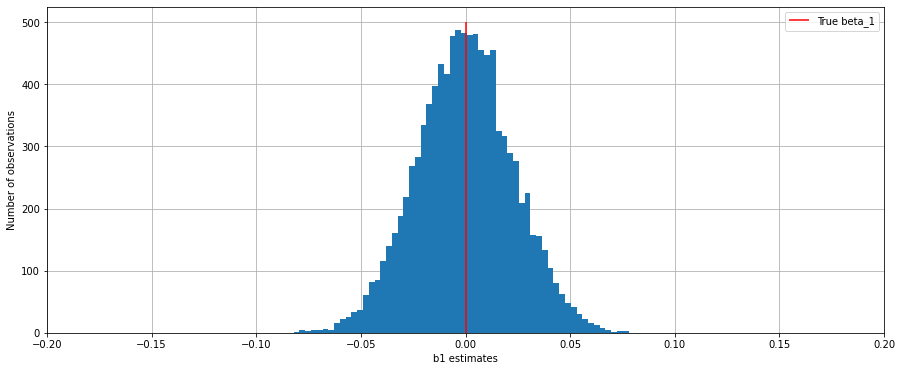

In [374]:
plt.figure(figsize=(15,6))
_ = plt.hist(sim_nocluster['b1'], bins='auto',zorder=2)
plt.vlines(x=0,ymin=0,ymax=500, color='red',zorder=3, label='True beta_1')

plt.xlim(-.2,.2)

plt.legend()
plt.xlabel("b1 estimates")
plt.ylabel("Number of observations")
plt.grid(zorder=0)

In [259]:
import altair as alt

### We can also see that, the clustering effects do not have any influence on how often we *incorrectly* reject the null hypothesis. Thus, with a CI 95%, we should get (approximately) a 5% rejection rate. I take samples of the returned 1000 simulations, but the average of the sample should match the simulations.

### Remember that here, we are rejecting the null hypothesis that 

In [362]:
print(f"Percent simulation rejected null {((10_000 - sim_nocluster['param_caught'].sum()) / 10_000)*100}%")

prop_rejections = []

sample_size = 100

for x in range(10000):
    sample_estimates = sim_nocluster.sample(sample_size)
    prop_rejections.append(
        (sample_size - sample_estimates['param_caught'].sum()) / sample_size
    )

mean_prop = np.mean(prop_rejections)

print(f"Percent rejected: {mean_prop*100}%")

Percent simulation rejected null 5.46%
Percent rejected: 5.470700000000001%


### Run the cell below to repeatedly visualize the incorrect rejections...

In [377]:
sample_estimates

,b1,se_b1,ci95_lower,ci95_upper,param_caught,id
32,-0.065169,0.022815,-0.109886,-0.020451,False,32
50,-0.054248,0.021298,-0.095993,-0.012504,False,50
90,-0.053094,0.021940,-0.096096,-0.010092,False,90
34,-0.050743,0.023365,-0.096539,-0.004946,False,34
58,-0.050677,0.022187,-0.094164,-0.007190,False,58
...,...,...,...,...,...,...
47,0.039360,0.020654,-0.001121,0.079842,True,47
68,0.042444,0.023810,-0.004224,0.089111,True,68
37,0.044537,0.025607,-0.005653,0.094727,True,37
6,0.047256,0.021691,0.004743,0.089770,False,6


In [379]:
sample_estimates.sort_values('b1',ascending=False)

,b1,se_b1,ci95_lower,ci95_upper,param_caught,id
81,0.077877,0.022945,0.032905,0.122850,False,81
6,0.047256,0.021691,0.004743,0.089770,False,6
37,0.044537,0.025607,-0.005653,0.094727,True,37
68,0.042444,0.023810,-0.004224,0.089111,True,68
47,0.039360,0.020654,-0.001121,0.079842,True,47
...,...,...,...,...,...,...
58,-0.050677,0.022187,-0.094164,-0.007190,False,58
34,-0.050743,0.023365,-0.096539,-0.004946,False,34
90,-0.053094,0.021940,-0.096096,-0.010092,False,90
50,-0.054248,0.021298,-0.095993,-0.012504,False,50


In [392]:
# Take a new sample and clean it up
sample_estimates = sim_nocluster.sample(sample_size)
sample_estimates = sample_estimates.sort_values('b1')
sample_estimates = sample_estimates.reset_index(drop=True)
sample_estimates['id'] = sample_estimates.index


domain_ = [True, False]
range_ = ['black', 'red']

points = alt.Chart(
    sample_estimates,
    title = '100 Randomly chosen b1 estimates'
).mark_point(filled=True).encode(
    x = alt.X("b1:Q", title ='b1'),
    y = alt.Y("id:Q", title='Sample ID'),
    color = alt.Color("param_caught:N")
)

ci_lines = alt.Chart(
    sample_estimates
).mark_line().encode(
    x = alt.X("ci95_lower:Q"),
    x2 = alt.X2("ci95_upper:Q"),
    y = alt.Y("id:Q"),
    color = alt.Color(
        "param_caught:N",
        title=['True b1','parameter value (0)','captured within CI'],
        scale=alt.Scale(domain=domain_, range=range_)
    )
)
truemeanline = alt.Chart(pd.DataFrame({
    'x' : [0]
})).mark_rule().encode(
    x = 'x:Q'
)

alt.layer(
    points,
    ci_lines,
    truemeanline
).properties(
    height=700
).configure_axis(
    titleFontSize=15,
    labelFontSize=14
).configure_legend(
    titleFontSize=15,
    labelFontSize=14
).configure_title(
    fontSize=15
)

alt.LayerChart(...)

### Now lets try this again by changing $\rho$

In [398]:
# [intercept, beta1] = [.4, 0]
sim_params = [.4, 0]

# Create 10k estimates with these parameters
sim_w_cluster = run_cluster_sim(
    n_sims=10_000,
    param = sim_params,
    rho=.5,
    cluster_robust = False
)

In [399]:
(10_000 - sim_w_cluster['param_caught'].sum())/10_000

0.4092

### Take a look at the histogram one more time....

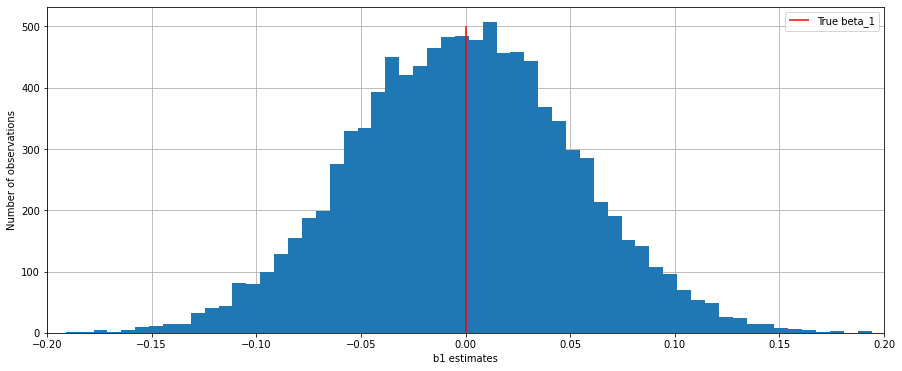

In [400]:
plt.figure(figsize=(15,6))
_ = plt.hist(sim_w_cluster['b1'], bins='auto',zorder=2)
plt.vlines(x=0,ymin=0,ymax=500, color='red',zorder=3, label='True beta_1')

plt.xlim(-.2,.2)

plt.legend()
plt.xlabel("b1 estimates")
plt.ylabel("Number of observations")
plt.grid(zorder=0)

In [401]:
print(f"Percent simulation rejected null {((10_000 - sim_w_cluster['param_caught'].sum()) / 10_000)*100}%")

Percent simulation rejected null 40.92%


In [402]:
# Take a new sample and clean it up
sample_estimates = sim_w_cluster.sample(sample_size)
sample_estimates = sample_estimates.sort_values('b1')
sample_estimates = sample_estimates.reset_index(drop=True)
sample_estimates['id'] = sample_estimates.index


domain_ = [True, False]
range_ = ['black', 'red']

points = alt.Chart(
    sample_estimates,
    title = '100 Randomly chosen b1 estimates'
).mark_point(filled=True).encode(
    x = alt.X("b1:Q", title ='b1'),
    y = alt.Y("id:Q", title='Sample ID'),
    color = alt.Color("param_caught:N")
)

ci_lines = alt.Chart(
    sample_estimates
).mark_line().encode(
    x = alt.X("ci95_lower:Q"),
    x2 = alt.X2("ci95_upper:Q"),
    y = alt.Y("id:Q"),
    color = alt.Color(
        "param_caught:N",
        title=['True b1','parameter value (0)','captured within CI'],
        scale=alt.Scale(domain=domain_, range=range_)
    )
)
truemeanline = alt.Chart(pd.DataFrame({
    'x' : [0]
})).mark_rule().encode(
    x = 'x:Q'
)

alt.layer(
    points,
    ci_lines,
    truemeanline
).properties(
    height=700
).configure_axis(
    titleFontSize=15,
    labelFontSize=14
).configure_legend(
    titleFontSize=15,
    labelFontSize=14
).configure_title(
    fontSize=15
)

alt.LayerChart(...)

### Now lets repeat this process with clustered data but make use of the "cluster-aware" regression

In [415]:
# [intercept, beta1] = [.4, 0]
sim_params = [.4, 0]

# Create 10k estimates with these parameters
sim_w_cluster = run_cluster_sim(
    n_sims=10_000,
    param = sim_params,
    rho=.5,               # not 1 causes clustered data
    cluster_robust = True # But we'll be taking it into account
)

In [417]:
((10_000 - sim_w_cluster['param_caught'].sum())/10_000)

6.890000000000001

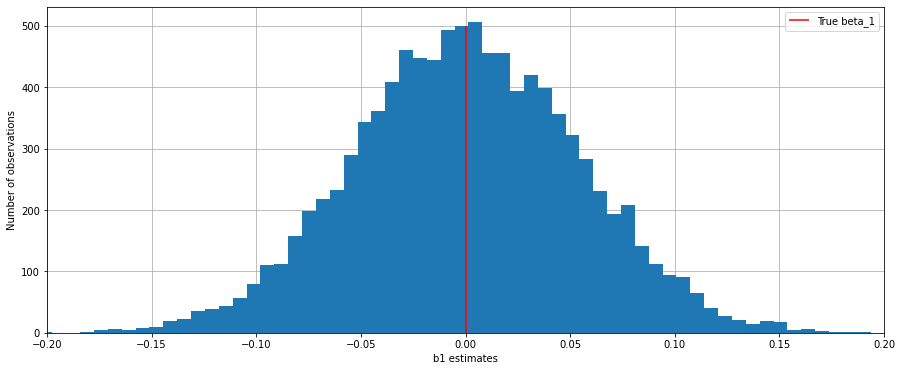

In [418]:
plt.figure(figsize=(15,6))
_ = plt.hist(sim_w_cluster['b1'], bins='auto',zorder=2)
plt.vlines(x=0,ymin=0,ymax=500, color='red',zorder=3, label='True beta_1')

plt.xlim(-.2,.2)

plt.legend()
plt.xlabel("b1 estimates")
plt.ylabel("Number of observations")
plt.grid(zorder=0)

In [419]:
print(f"Percent simulation rejected null {((10_000 - sim_w_cluster['param_caught'].sum()) / 10_000)*100}%")

Percent simulation rejected null 6.890000000000001%


In [429]:
# Take a new sample and clean it up
sample_estimates = sim_w_cluster.sample(sample_size)
sample_estimates = sample_estimates.sort_values('b1')
sample_estimates = sample_estimates.reset_index(drop=True)
sample_estimates['id'] = sample_estimates.index


domain_ = [True, False]
range_ = ['black', 'red']

points = alt.Chart(
    sample_estimates,
    title = '100 Randomly chosen b1 estimates'
).mark_point(filled=True).encode(
    x = alt.X("b1:Q", title ='b1'),
    y = alt.Y("id:Q", title='Sample ID'),
    color = alt.Color("param_caught:N")
)

ci_lines = alt.Chart(
    sample_estimates
).mark_line().encode(
    x = alt.X("ci95_lower:Q"),
    x2 = alt.X2("ci95_upper:Q"),
    y = alt.Y("id:Q"),
    color = alt.Color(
        "param_caught:N",
        title=['True b1','parameter value (0)','captured within CI'],
        scale=alt.Scale(domain=domain_, range=range_)
    )
)
truemeanline = alt.Chart(pd.DataFrame({
    'x' : [0]
})).mark_rule().encode(
    x = 'x:Q'
)

alt.layer(
    points,
    ci_lines,
    truemeanline
).properties(
    height=700
).configure_axis(
    titleFontSize=15,
    labelFontSize=14
).configure_legend(
    titleFontSize=15,
    labelFontSize=14
).configure_title(
    fontSize=15
)

alt.LayerChart(...)

In [406]:
rhos = np.array([1,.5,0])
allrhos = np.repeat(rhos, repeats=50)

In [407]:
datasets = []


for temp_rho in allrhos:
    datasets.append(gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = temp_rho))

{1: 0.7071781270161536,
 2: 1.198172115307831,
 3: 0.826048403721237,
 4: 0.8305526569707155,
 5: 0.7059712902542031,
 6: 0.7092506262692977,
 7: 0.7881460681017228,
 8: 0.7914424805194823,
 9: 1.0871409682498974,
 10: 1.3020988219125427,
 11: 1.114519042134536,
 12: 0.6044719253265579,
 13: 1.131533441864776,
 14: 0.6274906123891414,
 15: 1.232191593772438,
 16: 1.306546096507019,
 17: 0.7966347990803738,
 18: 1.2218052289988244,
 19: 1.174314469439438,
 20: 0.8403488749310353,
 21: 0.7905886407750509,
 22: 0.9544484018203429,
 23: 0.6130010811834331,
 24: 0.9018437095518356,
 25: 1.045021216082925,
 26: 0.9192175070947473,
 27: 1.6317992895586724,
 28: 0.817508568280941,
 29: 0.990374629059343,
 30: 1.0716464608288785,
 31: 0.7991457416835681,
 32: 1.135072112926072,
 33: 0.8347309860407313,
 34: 1.1214369654487641,
 35: 1.349507713934812,
 36: 1.8728761480041243,
 37: 0.6363650779844113,
 38: 1.1071565786925428,
 39: 1.3909793507560293,
 40: 0.7297457667013346,
 41: 1.03650035671964

In [432]:
info = {}

for idx, data in enumerate(zip(datasets,allrhos)):
    d, r = data
    xvars = d.groupby('cluster')['x'].var().to_dict()
    yvars = d.groupby('cluster')['y'].var().to_dict()
    
    info[idx] = {
        'rho':r,
        'xvars': xvars,
        'yvars': yvars
    }


In [435]:
datasets[0]

,x,y,cluster
0,-0.374795,2.067374,1
1,-1.038024,1.735759,1
2,-0.288700,2.110421,1
3,-0.520836,1.994353,1
4,-1.561646,1.473948,1
...,...,...,...
995,0.152174,0.183053,50
996,1.597068,0.905500,50
997,-0.056969,0.078481,50
998,0.112934,0.163433,50


In [445]:
results = []

for key,val in info.items():
    xvars_mean = np.mean(list(val['xvars'].items()))
    xvars_std = np.std(list(val['xvars'].items()))
    
    yvars_mean = np.var(list(val['yvars'].items()))
    yvars_std = np.var(list(val['yvars'].items()))
    
    r_temp = val['rho']
    
    results.append(
        (r_temp, xvars_mean, xvars_std, yvars_mean, yvars_std)
    )



In [446]:
newdf = pd.DataFrame(results)

In [448]:
newdf.columns = ('r_temp', 'xvars_mean', 'xvars_std', 'yvars_mean', 'yvars_std')

In [449]:
newdf

,r_temp,xvars_mean,xvars_std,yvars_mean,yvars_std
0,1.0,13.256415,15.939671,263.477803,263.477803
1,1.0,13.238676,15.953856,263.590896,263.590896
2,1.0,13.248938,15.945131,263.524431,263.524431
3,1.0,13.289234,15.914653,263.271079,263.271079
4,1.0,13.223657,15.964553,263.684041,263.684041
...,...,...,...,...,...
145,0.0,13.263671,15.934305,251.376494,251.376494
146,0.0,13.294493,15.910773,250.413606,250.413606
147,0.0,13.289790,15.914168,250.348592,250.348592
148,0.0,13.237717,15.954279,251.806488,251.806488


In [453]:
newdf.melt(id_vars='r_temp')

,r_temp,variable,value
0,1.0,xvars_mean,13.256415
1,1.0,xvars_mean,13.238676
2,1.0,xvars_mean,13.248938
3,1.0,xvars_mean,13.289234
4,1.0,xvars_mean,13.223657
...,...,...,...
595,0.0,yvars_std,251.376494
596,0.0,yvars_std,250.413606
597,0.0,yvars_std,250.348592
598,0.0,yvars_std,251.806488


In [457]:
alt.Chart(newdf.melt(id_vars='r_temp')).mark_point(size=100).encode(
    x = 'r_temp:O',
    y = 'mean(value):Q',
    color = 'variable:N',
    shape = 'variable:N'
).properties(width=500,height=500)

alt.Chart(...)

In [442]:
key

149

In [443]:
val

{'rho': 0.0,
 'xvars': {1: 0.962057473747658,
  2: 0.7928231159633945,
  3: 0.884968927160461,
  4: 0.6927115830513849,
  5: 0.6058170519955087,
  6: 0.6847167806890208,
  7: 0.7369269570559593,
  8: 0.5179513637809056,
  9: 0.8513655282798714,
  10: 1.3799608437304876,
  11: 1.9187545417505687,
  12: 0.42646021031543846,
  13: 1.0687345561706463,
  14: 0.9800900808300793,
  15: 1.0582470992089872,
  16: 1.4272734203496942,
  17: 0.8888928887824145,
  18: 0.6842748708380434,
  19: 0.44050019705430105,
  20: 0.6976976682162307,
  21: 1.1505694224166743,
  22: 1.4326616739611253,
  23: 1.2641823151109663,
  24: 1.1018251286666747,
  25: 1.064432890157604,
  26: 0.9597497984000437,
  27: 0.8266948585937485,
  28: 1.1282248899611809,
  29: 1.320569253369619,
  30: 0.8486276555787581,
  31: 1.084420903826475,
  32: 1.3803057911786407,
  33: 0.7141387187914585,
  34: 0.8880101203544307,
  35: 0.5325996059730059,
  36: 0.6594442737185888,
  37: 1.0290439764147687,
  38: 0.7421463098588277,
  

In [441]:
xvars_mean

13.21302897330243

In [414]:
datasets[0]

,x,y,cluster
0,-0.374795,2.067374,1
1,-1.038024,1.735759,1
2,-0.288700,2.110421,1
3,-0.520836,1.994353,1
4,-1.561646,1.473948,1
...,...,...,...
995,0.152174,0.183053,50
996,1.597068,0.905500,50
997,-0.056969,0.078481,50
998,0.112934,0.163433,50


In [227]:
np.mean(num_rejections)

5.067

In [277]:
sample_estimates = sim_nocluster.sample(sample_size)
sample_estimates['param_caught'].sum()

98

In [225]:

1 - sample_estimates['param_caught'].sum()


-94

In [134]:
Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

In [135]:
Sigma_i

array([[1. , 0. ],
       [0. , 0.5]])

In [136]:
values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

In [137]:
values_i

array([[-1.08085812, -0.6392409 ],
       [-0.64989879, -0.44544054],
       [-1.31799746,  0.4162152 ],
       ...,
       [-0.69015856, -0.88381486],
       [ 1.41766918,  1.04945865],
       [ 1.03296376,  1.03778787]])

In [138]:
cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
cluster_name

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12

In [146]:
Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
Sigma_cl

array([[1. , 0. ],
       [0. , 0.5]])

In [147]:
values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)
values_cl

array([[-0.48520193, -1.45529837],
       [-0.34622518, -0.14677401],
       [ 1.24082302, -0.90006691],
       [-1.35163237,  0.46705253],
       [ 1.39748901,  0.55455942],
       [-1.79164108, -0.41060827],
       [ 0.13083943, -1.23267429],
       [-0.64908561, -0.21254756],
       [ 0.87846571,  0.56264406],
       [ 0.62579503, -0.70609798],
       [-0.27480692,  0.05884786],
       [-2.18204164, -0.92634437],
       [ 1.1252696 , -0.52819834],
       [-1.30410295, -0.09409598],
       [-0.45241573,  0.11513713],
       [ 1.28464065,  1.6745619 ],
       [-0.98184157,  0.69684605],
       [-0.45373725, -0.47922879],
       [-0.25551794,  0.7808831 ],
       [ 0.04870407, -0.16133764],
       [-1.33234314, -0.95190226],
       [ 1.07084796, -0.37330364],
       [-0.05939749, -0.54988476],
       [ 0.39455471, -0.53210827],
       [ 0.75182492,  0.42704141],
       [ 0.18869935,  1.10553532],
       [ 0.80388271,  0.07495211],
       [ 0.64533009,  0.26878226],
       [-0.7672559 ,

In [149]:
x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)
len(x)

1000

In [151]:

values_i.shape

(1000, 2)

In [152]:
values_cl.shape

(50, 2)

In [153]:
values_cl

array([[-0.48520193, -1.45529837],
       [-0.34622518, -0.14677401],
       [ 1.24082302, -0.90006691],
       [-1.35163237,  0.46705253],
       [ 1.39748901,  0.55455942],
       [-1.79164108, -0.41060827],
       [ 0.13083943, -1.23267429],
       [-0.64908561, -0.21254756],
       [ 0.87846571,  0.56264406],
       [ 0.62579503, -0.70609798],
       [-0.27480692,  0.05884786],
       [-2.18204164, -0.92634437],
       [ 1.1252696 , -0.52819834],
       [-1.30410295, -0.09409598],
       [-0.45241573,  0.11513713],
       [ 1.28464065,  1.6745619 ],
       [-0.98184157,  0.69684605],
       [-0.45373725, -0.47922879],
       [-0.25551794,  0.7808831 ],
       [ 0.04870407, -0.16133764],
       [-1.33234314, -0.95190226],
       [ 1.07084796, -0.37330364],
       [-0.05939749, -0.54988476],
       [ 0.39455471, -0.53210827],
       [ 0.75182492,  0.42704141],
       [ 0.18869935,  1.10553532],
       [ 0.80388271,  0.07495211],
       [ 0.64533009,  0.26878226],
       [-0.7672559 ,